# GRIP - THE SPARKS FOUNDATION

## Data Science And Business Analytics - Internship
### Author : V.Vamsi

## Task5 : Exploratory Data Analysis - Sports

### Objective: Perform Exploratory Data Analysis On Indian Premier League

#### DataSet:  https://bit.ly/3fsDkFS

In [67]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Importing the data
matches = pd.read_csv('./datasets/matches.csv')
deliveries = pd.read_csv('./datasets/deliveries.csv')

In [5]:
#First five rows
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [68]:
print('Shape : {}'.format(matches.shape))
print('Data Columns: {}'.format(matches.columns))


Shape : (756, 18)
Data Columns: Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


##### Over here, we can see that no. of matches are 756 played. And we can say Average number of runs needed to win are 13.28

In [10]:
matches.isnull().sum()
#we can see that we have null values in city, player_of_match, umpire1, umpire2, umpire3 columns

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

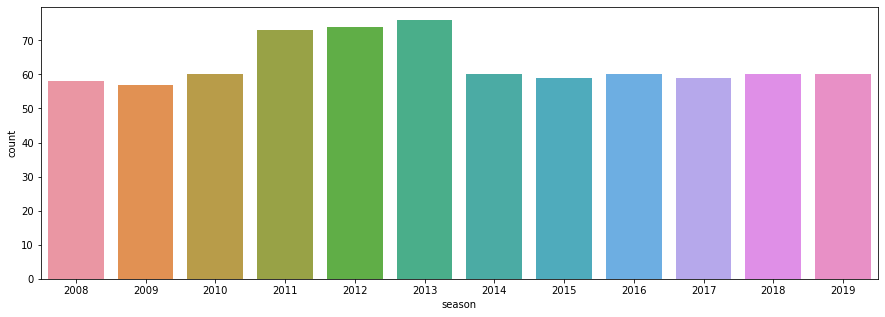

In [12]:
#The season which consisted of highest number of matches played
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'season', data = matches)
plt.show()

##### Over here we can say in this data we have matches data from 2008 - 2019 And season which consisted of highest number of matches played in is 2013

<AxesSubplot:xlabel='winner'>

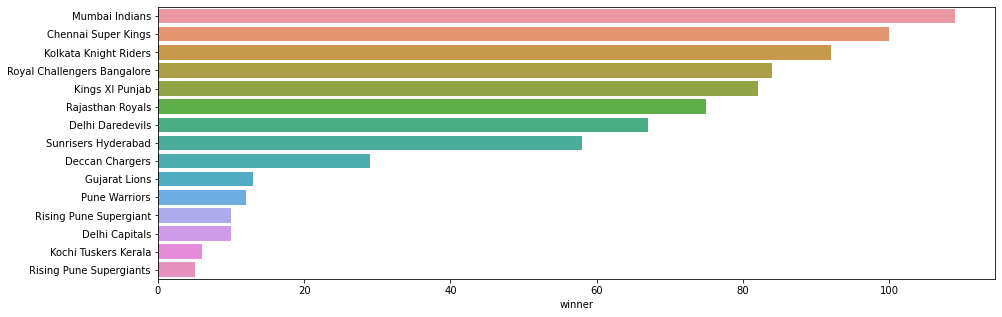

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
winners = matches.winner.value_counts()
sns.barplot(x = winners, y= winners.index)

##### We can find that the most succesful team is Mumbai Indians followed by Chennai Super Kings and so on...

False    363
True     393
dtype: int64


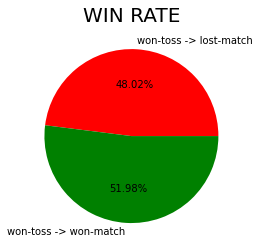

we cant say the toss is the key in winning the match


In [19]:
#Just checking the probability of winning a match if the toss won ->
win_prob = matches['toss_winner'] == matches['winner']
print(win_prob.groupby(win_prob).size())
win_rate = win_prob.groupby(win_prob).size()
labels = ['won-toss -> lost-match', 'won-toss -> won-match']
plt.pie(win_rate, labels = labels, autopct = '%0.2f%%', colors = ['red','green'])
plt.title('WIN RATE', fontsize = 20)
plt.show()
print('we cant say the toss is the key in winning the match')

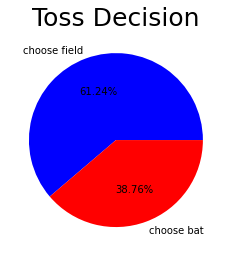

In [42]:
#Lets check what (Field or bat) choosen by toss winning team
toss=matches['toss_decision'].value_counts()
labels=['choose field','choose bat']
plt.pie(toss, labels=labels,colors = ["blue","red"], autopct = '%0.2f%%')
plt.title('Toss Decision',fontsize=25)
plt.show()

##### From this we can conclude that the teams who won the toss mostly(61.2%) choose to Filed(Bowling)

In [26]:
#Another important thing to notice is 'who was the man of the match many times'
matches['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
DA Warner          17
MS Dhoni           17
RG Sharma          17
                   ..
J Botha             1
SB Jakati           1
KMDN Kulasekara     1
J Archer            1
DP Nannes           1
Name: player_of_match, Length: 226, dtype: int64

##### From the data above we can conclude 'CH Gayle' was the man of the match with 21 times titles and 'AB de Villiers' was the next with 20 times titled man of the match

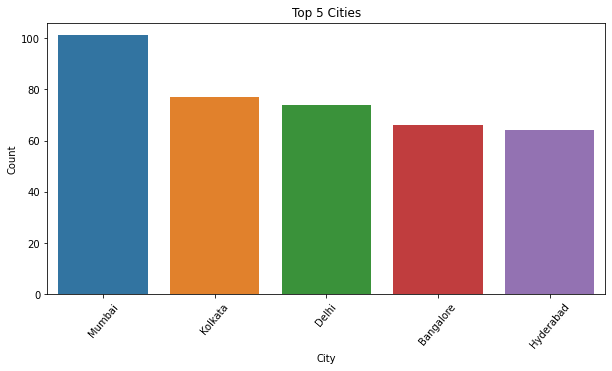

In [27]:
#Visualizing top 5 Cities where the most number of matches were played.
plt.subplots(figsize=(10,5))
sns.barplot(matches['city'].value_counts()[:5].index,matches['city'].value_counts()[:5].values)
plt.title('Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()


##### Conclusion: The most matches were played in Mumbai city.

### Number of matches in each venue

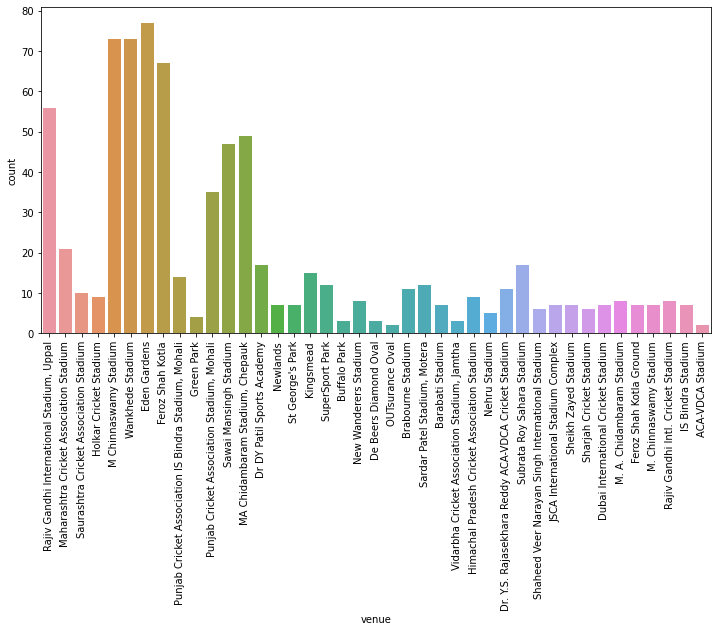

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation='vertical')
plt.show()

#### The Team which won by scoring maximum runs.

In [32]:
print('Team won by maximum runs: {}'.format(matches.iloc[matches['win_by_runs'].idxmax()]['winner']))

Team won by maximum runs: Mumbai Indians


#### The Team which won by minimum runs.

In [36]:
print('Team won by minimum runs: {}'.format(matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']))

Team won by minimum runs: Mumbai Indians


#### The Team which won by minimum wickets.

In [39]:
print('Team won by minimum wickets: {}'.format(matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']
))

Team won by minimum wickets: Kolkata Knight Riders


### Results: 
    1. Mumbai Indians is the team which won by maximum and minimum runs
    2. Kolkata Knight Riders is the team which won by the maximum and minimum wickets

### Champions each season:

In [41]:
temp = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


## Lets analyze the deliveries data

In [43]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [53]:
print('Shape of the data: {}'.format(deliveries.shape))

Shape of the data: (179078, 21)


### Batsman Analysis - Top run scorers in IPL

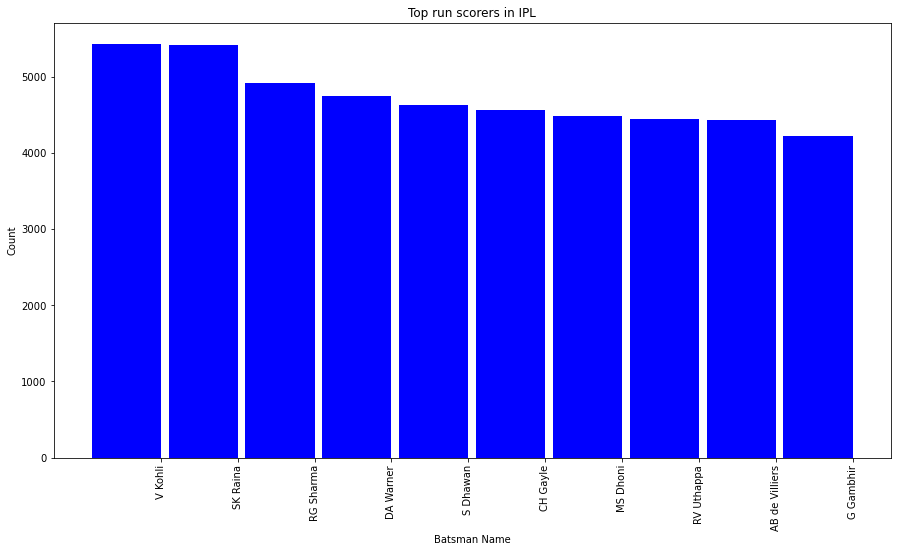

In [52]:
batting = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batting = batting.iloc[:10,:]

labels = np.array(batting['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batting['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsman Name')
plt.show()

##### Virat Kohli is leading the chart followed closely by Raina. Warner is the top scorer among foriegn players

In [54]:
# Total matches where Super over was and wasn't played
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [57]:
print('Overall runs given by extras: {}'.format(sum(deliveries['extra_runs'])))
print('Overall runs given by no balls: {}'.format(sum(deliveries['noball_runs'])))
print('Overall runs given by penalty: {}'.format(sum(deliveries['penalty_runs'])))

Overall runs given by extras: 12004
Overall runs given by no balls: 749
Overall runs given by penalty: 10


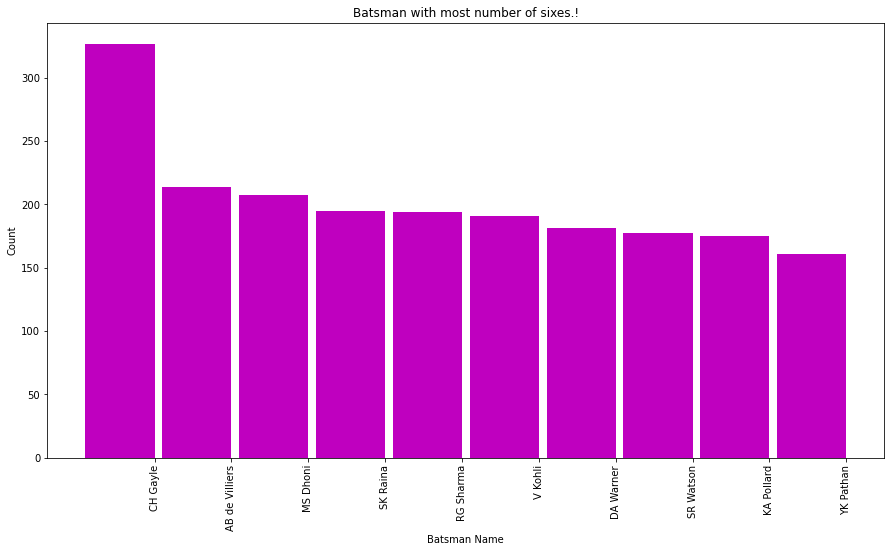

In [63]:
# Now let us check the number of 6's
sixes = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
sixes = sixes.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(sixes['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsman Name')
plt.show()

### There you can see 'Gayle' is leading the most sixes race

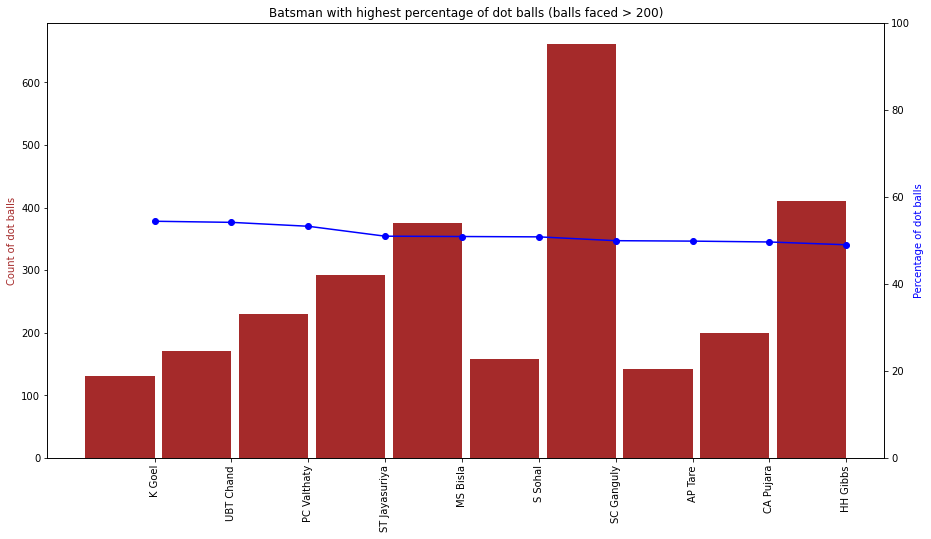

In [65]:
def balls_faced(balls):
    return len(balls)

def dot_balls(balls):
    return (balls==0).sum()

temp_df = deliveries.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()


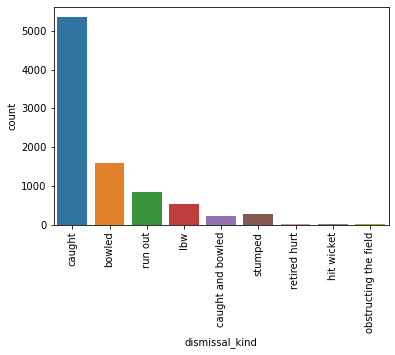

In [64]:
# kinds of dismissal
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)
plt.show()

### We can observe that most dismissals are done in the form of 'caught' followed by 'bowled'

# Thank You! for bringing to this end

### You can check out more at : github.com/Viswanadhamvamsi